In [1]:
import pandas as pd
import pickle
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [3]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [4]:
# Creating the targer variable called duration

df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

# df = df[(df.duration >= 1) & (df.duration <= 60)]

# categorical = ['PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

# df[categorical] = df[categorical].astype(str)

In [5]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
VendorID,3066766.0,1.730215,1.0,1.0,2.0,2.0,2.0,0.443848
tpep_pickup_datetime,3066766,2023-01-17 00:22:26.288164,2008-12-31 23:01:42,2023-01-09 16:21:57.250000,2023-01-17 08:42:29.500000,2023-01-24 16:26:27,2023-02-01 00:56:53,NaN
tpep_dropoff_datetime,3066766,2023-01-17 00:38:06.427874,2009-01-01 14:29:11,2023-01-09 16:37:06,2023-01-17 08:58:30.500000,2023-01-24 16:42:49,2023-02-02 09:28:47,NaN
passenger_count,2995023.0,1.362532,0.0,1.0,1.0,1.0,9.0,0.89612
trip_distance,3066766.0,3.847342,0.0,1.06,1.8,3.33,258928.15,249.583756
RatecodeID,2995023.0,1.49744,1.0,1.0,1.0,1.0,99.0,6.474767
PULocationID,3066766.0,166.398046,1.0,132.0,162.0,234.0,265.0,64.244131
DOLocationID,3066766.0,164.392631,1.0,114.0,162.0,234.0,265.0,69.943682
payment_type,3066766.0,1.194483,0.0,1.0,1.0,1.0,4.0,0.529476
fare_amount,3066766.0,18.367069,-900.0,8.6,12.8,20.5,1160.1,17.807822


In [6]:
# sns.displot(x='duration', data=df)
# plt.xlim(0,100)

In [7]:
# # Checking the count of outliers
df_outliers = df.loc[df['duration'] > 60]
print(df_outliers.shape)
print(df.shape)

(24258, 20)
(3066766, 20)


There are 99 % of the remaining data

In [8]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)
    

In [9]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [10]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [11]:
X_train

<3009173x516 sparse matrix of type '<class 'numpy.float64'>'
	with 9027519 stored elements in Compressed Sparse Row format>

In [12]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

In [13]:
target = 'duration'
y_train = df[target].values

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mse = mean_squared_error(y_train, y_pred, squared=False)
print(mse)

7.658405435591001


In [15]:
# Calculate standard deviation of the predictions
std_dev1 = np.std(y_pred)

# Print the standard deviation
print("Standard Deviation of Predicted Durations:", std_dev1)


Standard Deviation of Predicted Durations: 6.333812432423085


In [16]:
rmse = np.sqrt(mse)
print(rmse)

2.767382415856363


/tmp/ipykernel_79736/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_79736/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


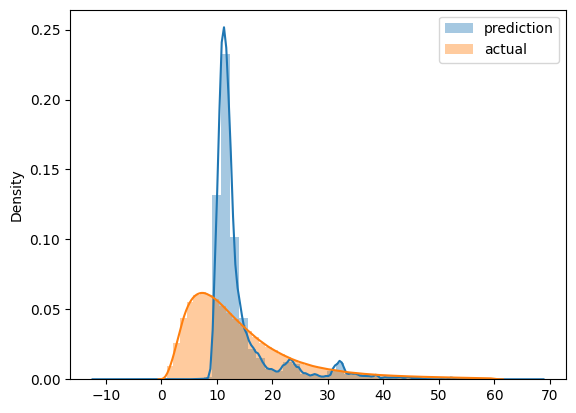

In [17]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [18]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

#### Validation

In [19]:
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet')

In [20]:
len(df_train), len(df_val)

(3009173, 3316216)

In [21]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [22]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [23]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

5.7098169725844485

In [25]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred, squared=False))
print(rmse)

2.3895223314680383


In [26]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [27]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

9.953264522435173

In [28]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred, squared=False))
print(rmse)

3.1548794782741183


In [29]:
# Calculate standard deviation of the predictions
std_dev = np.std(y_pred)

# Print the standard deviation
print("Standard Deviation of Predicted Durations:", std_dev)

Standard Deviation of Predicted Durations: 2.1569361752165515
